# Based on 200 unique reviews on the movie `Take Off `
### URL : https://in.bookmyshow.com/kochi/movies/take-off/ET00052469

### `Load libraries required`

In [2]:
library('stringr')
library('readr')
library('wordcloud')
library('tm')
library('SnowballC')
library('RSentiment')
library(DT)

In [3]:
path  <- getwd()
setwd  <- path

### `Load the data and remove the duplicates`

In [5]:
take_off  <- read.csv('take_off/reviews.csv',header = TRUE)
cat("Dimension before dropping duplicates : ", dim(take_off),"\n")
take_off <- unique(take_off)
cat("Dimension after dropping duplicates : ", dim(take_off))

Dimension before dropping duplicates :  400 12 
Dimension after dropping duplicates :  200 12

In [25]:
head(take_off,n=3)

Date,Dislikes,Image,Likes,Name,Rating,RelativeDate,Review,ReviewId,Title,URCount,Verified
2017-03-30 12:23:31,0,https://graph.facebook.com/10204302839170159/picture?type=square,0,Sandeep,80,20 minutes ago,Nice one ... Parvathi is the star of this movie .. Kunchakko and Fahad did their part very well too ... Hats off to the director .. realistic and one of it's kind ...,17704866,Take Off,4,N
2017-03-30 12:21:02,0,https://www.gravatar.com/avatar/360ab7b1956bf9ea15d0a2c53b59e838?s=50&d=https%3A%2F%2Fin.bmscdn.com%2Fin%2Fsynopsis-new%2Fnoimguser.jpg&r=g,0,Neeraja,100,22 minutes ago,"The movie was so good... Will hold you to the seat till the end... Great performance by Parvathy, Kunchacko boban... Loved the movie so much...",17704674,One among the best movies,1,N
2017-03-30 12:03:15,0,https://www.gravatar.com/avatar/38a73e10ff05040cc0066af5062c9138?s=50&d=https%3A%2F%2Fin.bmscdn.com%2Fin%2Fsynopsis-new%2Fnoimguser.jpg&r=g,0,Krishna,100,40 minutes ago,"Awesome movie. Must watch. Fahad Fazil, Parvathi, Kunchacko Boban superb performance. Direction, Camera, Editing everything is perfect. Hats off to the entire team behind this movie.",17703383,Must watch movie,1,N


### `Select the column contains review`

In [4]:
r1 = as.character(take_off$Review)

In [5]:
sample = sample(r1, (length(r1))) # Taking a random sample vector of length of r1 from r1 

`The main structure for managing documents in tm is a so-called Corpus, representing a collection of text
documents. A corpus is an abstract concept, and there can exist several implementations in parallel. The
default implementation is the so-called VCorpus (short for Volatile Corpus) which realizes a semantics as known
from most R objects: corpora are R objects held fully in memory. We denote this as volatile since once the
R object is destroyed, the whole corpus is gone. Such a volatile corpus can be created via the constructor
VCorpus(x, readerControl). Another implementation is the PCorpus which implements a Permanent Corpus
semantics, i.e., the documents are physically stored outside of R (e.g., in a database), corresponding R objects
are basically only pointers to external structures, and changes to the underlying corpus are reflected to all R
objects associated with it. Compared to the volatile corpus the corpus encapsulated by a permanent corpus
object is not destroyed if the corresponding R object is released.
Within the corpus constructor, x must be a Source object which abstracts the input location. tm provides a
set of predefined sources, e.g., DirSource, VectorSource, or DataframeSource, which handle a directory, a vector
interpreting each component as document, or data frame like structures (like CSV files), respectively. Except
DirSource, which is designed solely for directories on a file system, and VectorSource, which only accepts (character)
vectors, most other implemented sources can take connections as input (a character string is interpreted
as file path). getSources() lists available sources, and users can create their own sources.`

Read more on tm package here : https://cran.r-project.org/web/packages/tm/vignettes/tm.pdf

In [6]:
corpus = Corpus(VectorSource(list(sample))) 

In [7]:
corpus = tm_map(corpus, removePunctuation) # removes punctuations from the text corpuses
corpus = tm_map(corpus, content_transformer(tolower)) # to lower case to avoid obvious redundancy
corpus = tm_map(corpus, removeNumbers) # removing numbers
corpus = tm_map(corpus, stripWhitespace) # stripping white spaces

`In computing, stop words are words which are filtered out before or after processing of natural language data (text).[1] Though stop words usually refer to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list.`

Check stop words in english here : http://www.ranks.nl/stopwords

In [9]:
corpus = tm_map(corpus, removeWords, stopwords('english')) # removing stop words

`In linguistic morphology and information retrieval, stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form. The stem need not be identical to the morphological root of the word`

E.g. The stem word of all three words listed down is **account**
+ accounts
+ account   
+ accounting 

- Read more about stemming here : https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
- Read more about SnowballC package here : https://cran.r-project.org/web/packages/SnowballC/SnowballC.pdf

In [10]:
corpus = tm_map(corpus, stemDocument)

## `Bag of word model` 

`The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.`

Read more on Bag of Words model here : http://cs.nyu.edu/~fergus/teaching/vision_2012/9_BoW.pdf

In [11]:
dtm_up = DocumentTermMatrix(VCorpus(VectorSource(corpus[[1]]$content)))

## `Frequency matrix with words and occurances`

In [12]:
freq_up <- colSums(as.matrix(dtm_up))

## `Displaying the most occured 10 words in the corpus`

In [13]:
for_display  <- data.frame(colnames(dtm_up),colSums(as.matrix(dtm_up)))
rownames(for_display) <- NULL
colnames(for_display) <- c("Word","Count")
for_display <- for_display[order(-for_display$Count),] 
rownames(for_display) <- NULL
head(for_display,n=10)

Word,Count
movi,244
parvathi,88
watch,81
act,60
fahad,58
good,57
film,54
malayalam,52
well,47
best,46


## `Calculating Sentiments`

In [14]:
sentiments_up = calculate_sentiment(names(freq_up))
sentiments_up = cbind(sentiments_up, as.data.frame(freq_up))

In [15]:
sent_pos_up = sentiments_up[sentiments_up$sentiment == 'Positive',]
sent_neg_up = sentiments_up[sentiments_up$sentiment == 'Negative',]

+ Read more about Sentiment Analysis here : https://lct-master.org/files/MullenSentimentCourseSlides.pdf
+ Read more about RSentiment Package here : https://cran.r-project.org/web/packages/RSentiment/RSentiment.pdf

## `Displaying Positive words in corpus`

In [16]:
for_display_two  <- sent_pos_up
for_display_two  <- for_display_two[order(-for_display_two$freq_up),]
rownames(for_display_two) <- NULL
head(for_display_two,n=10)

text,sentiment,freq_up
good,Positive,57
well,Positive,47
best,Positive,46
great,Positive,46
like,Positive,30
excel,Positive,29
superb,Positive,27
brilliant,Positive,20
perfect,Positive,15
super,Positive,13


## `Displaying Negative words in corpus`

In [17]:
for_display_three  <- sent_neg_up
for_display_three  <- for_display_three[order(-for_display_three$freq_up),]
rownames(for_display_three) <- NULL
head(for_display_three,n=10)

text,sentiment,freq_up
miss,Negative,17
blow,Negative,5
lag,Negative,5
bore,Negative,4
pleas,Negative,3
risk,Negative,3
stun,Negative,3
suffer,Negative,3
attack,Negative,2
bad,Negative,2


In [18]:
cat("We have far lower negative Sentiments: ",sum(sent_neg_up$freq_up)," than positive: ",sum(sent_pos_up$freq_up))

We have far lower negative Sentiments:  82  than positive:  471

## `Representing as word cloud (Positive words)`

Warning message in par(fig = c(0, 1, 0, 1), new = TRUE):
"calling par(new=TRUE) with no plot"

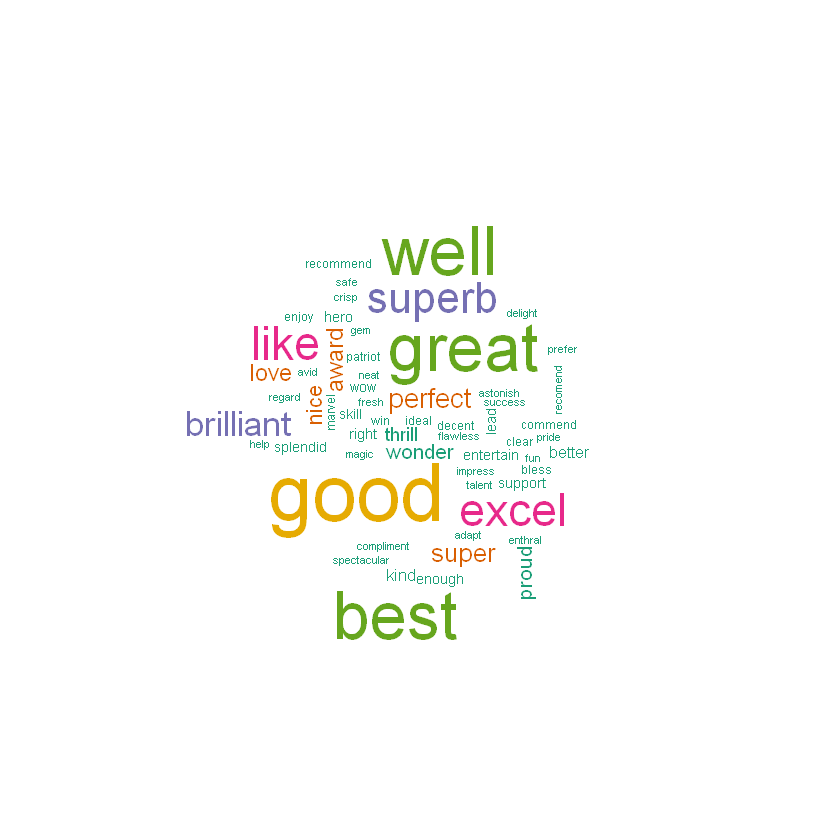

In [19]:
par(fig=c(0,1,0,1), new=TRUE)
set.seed(100)
wordcloud(sent_pos_up$text,sent_pos_up$freq,min.freq=1,colors=brewer.pal(6,"Dark2"))

Warning message in par(fig = c(0, 1, 0, 1), new = TRUE):
"calling par(new=TRUE) with no plot"

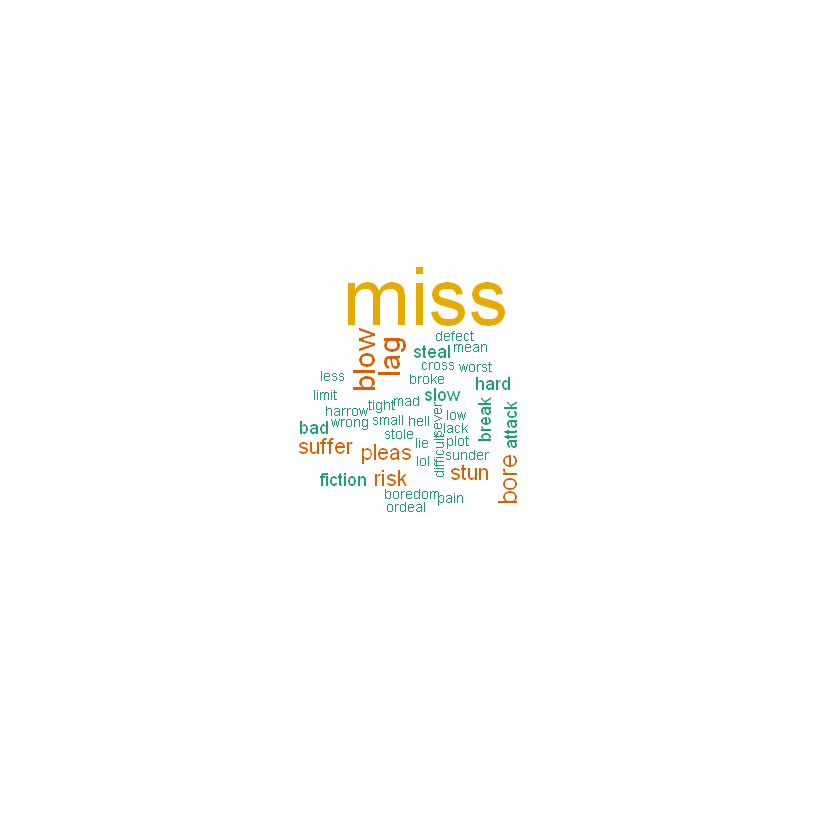

In [20]:
par(fig=c(0,1,0,1), new=TRUE)
set.seed(100)
wordcloud(sent_neg_up$text,sent_neg_up$freq, min.freq=1,colors=brewer.pal(6,"Dark2"))

`Checking these words in each review and finding which category of words (Positive or Negative) occured mostly in the sentence will give us the sentiments of it. This is obviously a hello world approach.`

## `Using a better way to find sentiments : syuzhet`

Read more on syuzhet here : https://cran.r-project.org/web/packages/syuzhet/vignettes/syuzhet-vignette.html

### `Get the input text and libraries`

In [7]:
library(ggplot2) # Data visualization
library(syuzhet)

In [8]:
#Approach 2 - using the 'syuzhet' package
text = as.character(take_off$Review) 

In [9]:
##let's clean html links
some_txt<-gsub("http[^[:blank:]]+","",text)

In [10]:
##let's remove people names
some_txt<-gsub("@\\w+","",some_txt)

In [11]:
##let's remove punctuations
some_txt<-gsub("[[:punct:]]"," ",some_txt)

In [12]:
##let's remove number (alphanumeric)
some_txt<-gsub("[^[:alnum:]]"," ",some_txt)

## `Catagorized sentiments scores using Saif Mohammad’s NRC Emotion lexicon`

In [13]:
mysentiment<-get_nrc_sentiment((some_txt))

In [14]:
mysentiment.positive =sum(mysentiment$positive)
mysentiment.anger =sum(mysentiment$anger)
mysentiment.anticipation =sum(mysentiment$anticipation)
mysentiment.disgust =sum(mysentiment$disgust)
mysentiment.fear =sum(mysentiment$fear)
mysentiment.joy =sum(mysentiment$joy)
mysentiment.sadness =sum(mysentiment$sadness)
mysentiment.surprise =sum(mysentiment$surprise)
mysentiment.trust =sum(mysentiment$trust)
mysentiment.negative =sum(mysentiment$negative)

## `Create the bar chart`

In [15]:
yAxis <- c(mysentiment.positive,mysentiment.anger,mysentiment.anticipation,mysentiment.disgust,mysentiment.fear,
+ mysentiment.joy,+ mysentiment.sadness,+ mysentiment.surprise,+ mysentiment.trust,+ mysentiment.negative)
xAxis <- c("Positive","Anger","Anticipation","Disgust","Fear","Joy","Sadness","Surprise","Trust","Negative")
plot_df  <- data.frame(xAxis,yAxis)
colnames(plot_df)  <- c("Emotion","Score")
plot_df  <- plot_df[order(-plot_df$Score),]
rownames(plot_df) <- NULL
plot_df

Emotion,Score
Positive,554
Trust,401
Anticipation,279
Joy,278
Surprise,148
Fear,124
Negative,115
Anger,64
Sadness,44
Disgust,26


In [19]:
write.csv(plot_df,"../take_off/out.csv") # storing the plot data 

# Beautify using ggplot2

Read more about bar plots using ggplot2 here :http://www.sthda.com/english/wiki/ggplot2-barplots-quick-start-guide-r-software-and-data-visualization

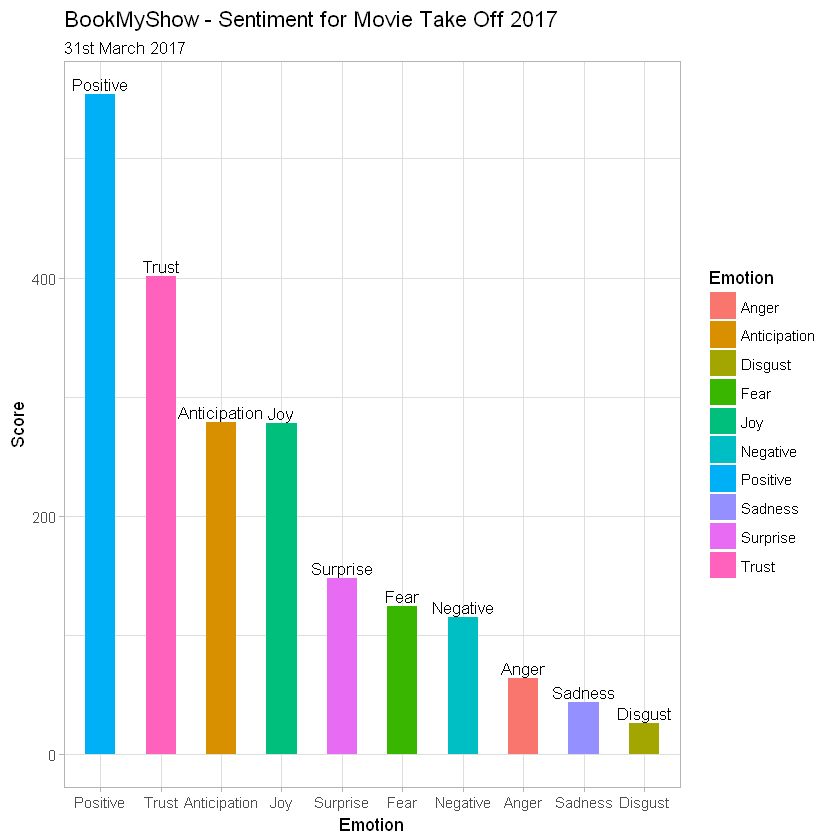

In [105]:
ggplot(plot_df,aes(Emotion,Score),fill =Emotion)+
    geom_bar(stat = "identity", aes(fill = Emotion),position = "dodge",width=0.5) +
    xlab("Emotion") + ylab("Score") +
    labs(x="Emotion", 
              y="Score",
              title="BookMyShow - Sentiment for Movie Take Off 2017",
              subtitle="31st March 2017")+
    theme(axis.text.x=element_text(angle=-45, hjust=0, vjust=1))+
    theme(plot.title=element_text(size=18, hjust=0.5, face="bold", colour="Black", vjust=-1))+
    theme(plot.subtitle=element_text(size=15, hjust=0.5, face="italic", color="black"))+
    geom_text(aes(label=Emotion), vjust=-0.3, color="black", size=3.5)+
    scale_x_discrete(limits=plot_df$Emotion)+
    theme_light()